# Dog Bite Incidents Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('seaborn')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("D:\Open Classroom\Datasets\Dog Bite Incidents Dataset\DOHMH_Dog_Bite_Data.csv")
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [38]:
df.shape

(22663, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
UniqueID      22663 non-null int64
DateOfBite    22663 non-null object
Species       22663 non-null object
Breed         20445 non-null object
Age           11442 non-null object
Gender        22663 non-null object
SpayNeuter    22663 non-null bool
Borough       22663 non-null object
ZipCode       16805 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [40]:
df.isnull().sum()

UniqueID          0
DateOfBite        0
Species           0
Breed          2218
Age           11221
Gender            0
SpayNeuter        0
Borough           0
ZipCode        5858
dtype: int64

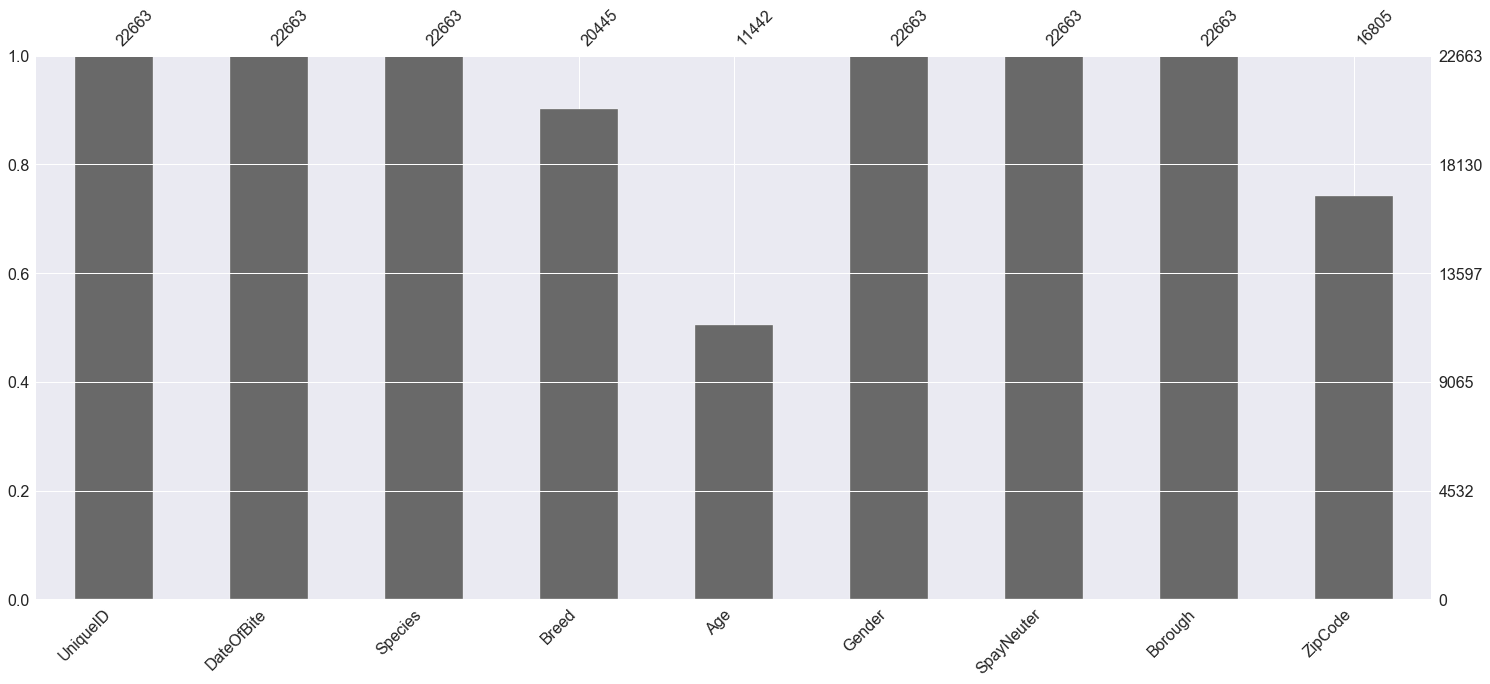

In [41]:
msno.bar(df)

### Data Cleaning and Manipulation

In [42]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [43]:
df['DateOfBite'] = pd.to_datetime(df['DateOfBite'])

In [44]:
df['Breed'].replace(np.nan, 'MISSING VAL', inplace = True)

In [50]:
df['ZipCode'].replace(np.nan, 0, inplace = True)
df['ZipCode'].replace('?', 0, inplace = True)
df['ZipCode'] = pd.to_numeric(df['ZipCode'])

In [46]:
df.drop(columns = ['Age'], inplace = True)

In [47]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Gender,SpayNeuter,Borough,ZipCode
0,1,2018-01-01,DOG,UNKNOWN,U,False,Brooklyn,11220
1,2,2018-01-04,DOG,UNKNOWN,U,False,Brooklyn,0
2,3,2018-01-06,DOG,Pit Bull,U,False,Brooklyn,11224
3,4,2018-01-08,DOG,Mixed/Other,M,False,Brooklyn,11231
4,5,2018-01-09,DOG,Pit Bull,U,False,Brooklyn,11224


In [48]:
df.isnull().sum()

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 8 columns):
UniqueID      22663 non-null int64
DateOfBite    22663 non-null datetime64[ns]
Species       22663 non-null object
Breed         22663 non-null object
Gender        22663 non-null object
SpayNeuter    22663 non-null bool
Borough       22663 non-null object
ZipCode       22663 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 1.2+ MB


In [52]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Gender,SpayNeuter,Borough,ZipCode
0,1,2018-01-01,DOG,UNKNOWN,U,False,Brooklyn,11220
1,2,2018-01-04,DOG,UNKNOWN,U,False,Brooklyn,0
2,3,2018-01-06,DOG,Pit Bull,U,False,Brooklyn,11224
3,4,2018-01-08,DOG,Mixed/Other,M,False,Brooklyn,11231
4,5,2018-01-09,DOG,Pit Bull,U,False,Brooklyn,11224


Text(0.5, 1.0, 'Yearly Rate of Dog Bite Incidents')

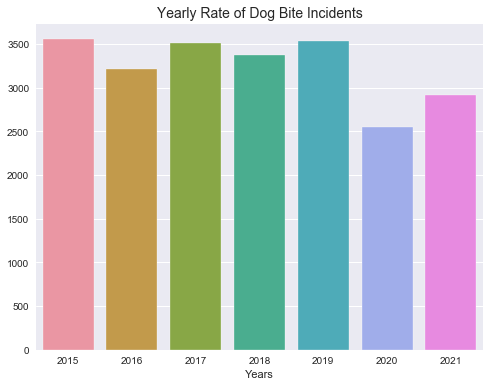

In [59]:
plt.figure(figsize = (8, 6))
sb.countplot(df['DateOfBite'].dt.year)
plt.ylabel(None)
plt.xlabel('Years')
plt.title('Yearly Rate of Dog Bite Incidents', fontdict = {'size':14})

Text(0.5, 1.0, 'Monthly Rate of Dog Bite Incidents')

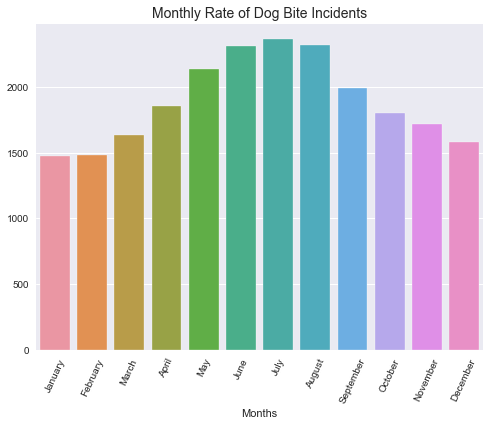

In [65]:
plt.figure(figsize = (8, 6))
sb.countplot(df['DateOfBite'].dt.month_name())
plt.ylabel(None)
plt.xlabel('Months')
plt.xticks(rotation = 65)
plt.title('Monthly Rate of Dog Bite Incidents', fontdict = {'size':14})

Text(0.5, 1.0, 'Weekly Rate of Dog Bite Incidents')

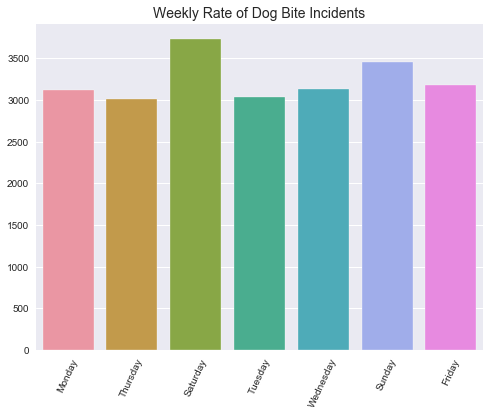

In [70]:
plt.figure(figsize = (8, 6))
sb.countplot(df['DateOfBite'].dt.day_name())
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation = 65)
plt.title('Weekly Rate of Dog Bite Incidents', fontdict = {'size':14})

Text(0.5, 1.0, 'Daily Rate of Dog Bite Incidents')

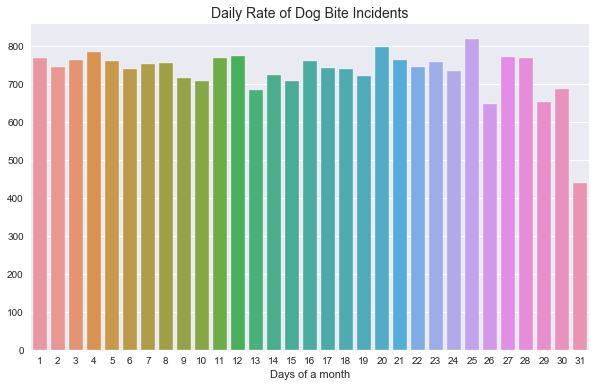

In [74]:
plt.figure(figsize = (10, 6))
sb.countplot(df['DateOfBite'].dt.day)
plt.ylabel(None)
plt.xlabel('Days of a month')
plt.title('Daily Rate of Dog Bite Incidents', fontdict = {'size':14})

In [75]:
df.set_index(df['DateOfBite'], inplace = True)

In [84]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Gender,SpayNeuter,Borough,ZipCode
DateOfBite,,,,,,,,
2018-01-01,1,2018-01-01,DOG,UNKNOWN,U,False,Brooklyn,11220
2018-01-04,2,2018-01-04,DOG,UNKNOWN,U,False,Brooklyn,0
2018-01-06,3,2018-01-06,DOG,Pit Bull,U,False,Brooklyn,11224
2018-01-08,4,2018-01-08,DOG,Mixed/Other,M,False,Brooklyn,11231
2018-01-09,5,2018-01-09,DOG,Pit Bull,U,False,Brooklyn,11224


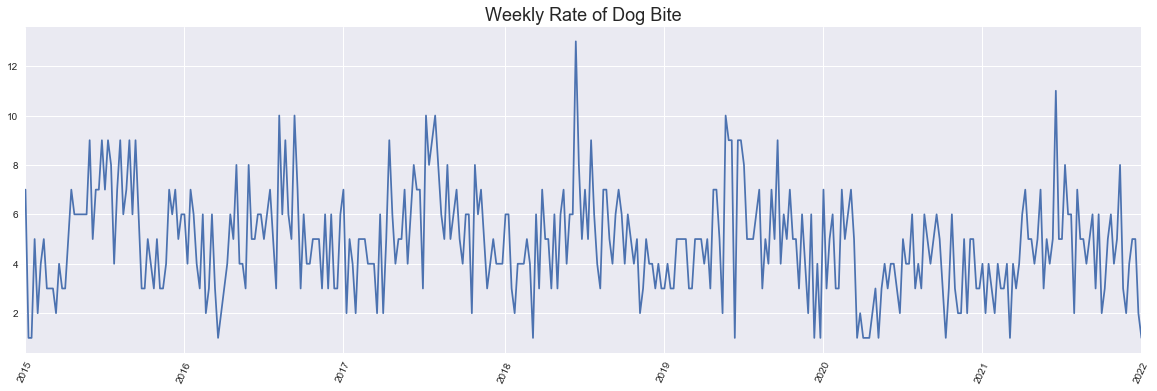

In [87]:
plt.figure(figsize = (20,6))
daily = df['DateOfBite'].value_counts().resample('W').min().plot(kind='line')
plt.title('Weekly Rate of Dog Bite', fontdict = {'size':18})
plt.xticks(rotation = 65)
daily

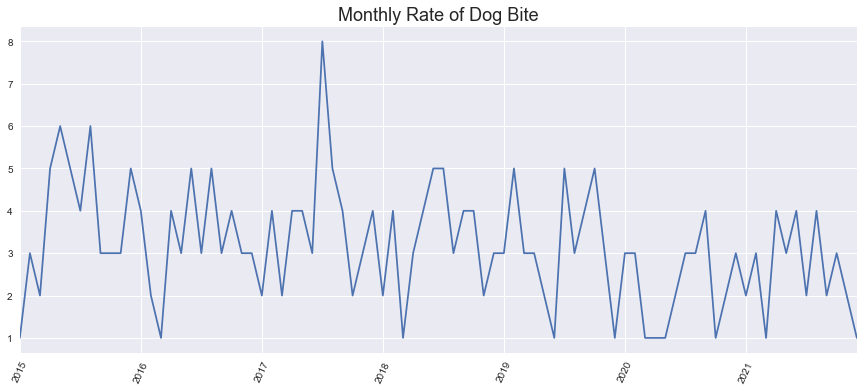

In [83]:
plt.figure(figsize = (15,6))
daily = df['DateOfBite'].value_counts().resample('M').min().plot(kind='line')
plt.title('Monthly Rate of Dog Bite', fontdict = {'size':18})
plt.xticks(rotation = 65)
daily

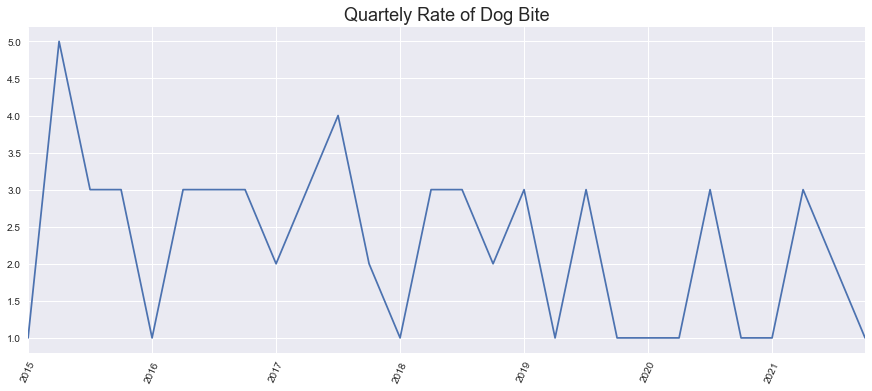

In [90]:
plt.figure(figsize = (15,6))
daily = df['DateOfBite'].value_counts().resample('Q').min().plot(kind='line')
plt.title('Quartely Rate of Dog Bite', fontdict = {'size':18})
plt.xticks(rotation = 65)
daily

In [91]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Gender,SpayNeuter,Borough,ZipCode
DateOfBite,,,,,,,,
2018-01-01,1,2018-01-01,DOG,UNKNOWN,U,False,Brooklyn,11220
2018-01-04,2,2018-01-04,DOG,UNKNOWN,U,False,Brooklyn,0
2018-01-06,3,2018-01-06,DOG,Pit Bull,U,False,Brooklyn,11224
2018-01-08,4,2018-01-08,DOG,Mixed/Other,M,False,Brooklyn,11231
2018-01-09,5,2018-01-09,DOG,Pit Bull,U,False,Brooklyn,11224


Text(0.5, 1.0, 'Top 30 Common Biting Dog Breeds')

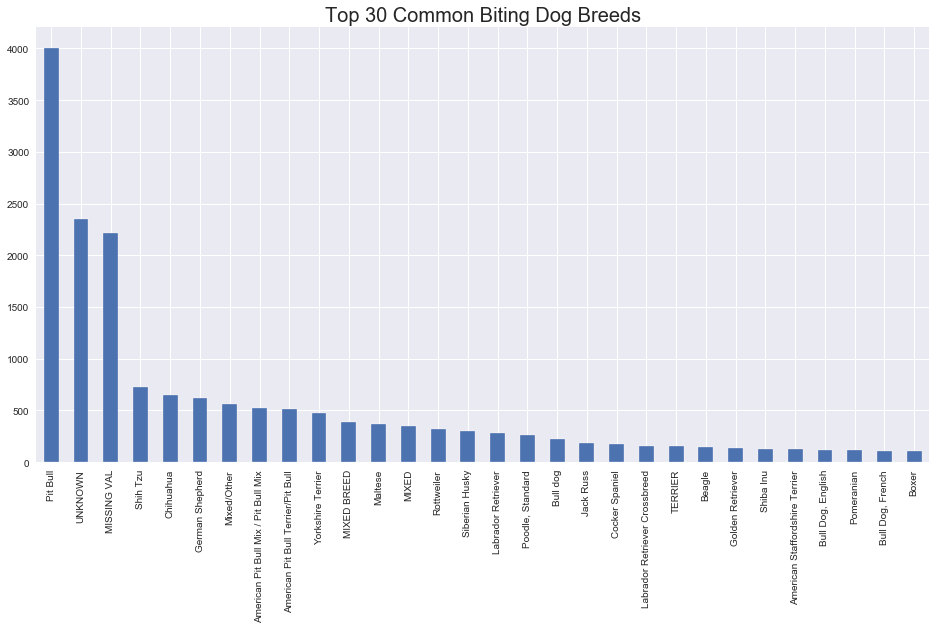

In [104]:
plt.figure(figsize = (16, 8))
df['Breed'].value_counts().head(30).plot(kind = 'bar')
plt.title('Top 30 Common Biting Dog Breeds', fontdict = {'size': 20})

Text(0.5, 1.0, 'Towns Based on Incidents recorded')

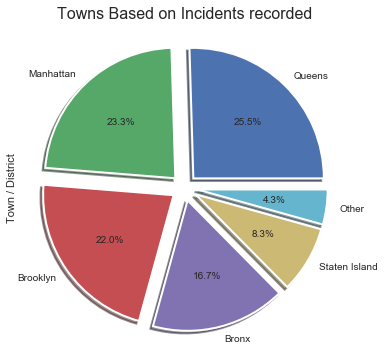

In [122]:
sb.set_style('whitegrid')
plt.figure(figsize = (10,6))
df['Borough'].value_counts().plot(kind = 'pie', autopct="%1.1f%%", wedgeprops = {'linewidth':2}, shadow = True, explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.ylabel('Town / District')
plt.title('Towns Based on Incidents recorded', fontdict = {'size':16})

In [123]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Gender,SpayNeuter,Borough,ZipCode
DateOfBite,,,,,,,,
2018-01-01,1,2018-01-01,DOG,UNKNOWN,U,False,Brooklyn,11220
2018-01-04,2,2018-01-04,DOG,UNKNOWN,U,False,Brooklyn,0
2018-01-06,3,2018-01-06,DOG,Pit Bull,U,False,Brooklyn,11224
2018-01-08,4,2018-01-08,DOG,Mixed/Other,M,False,Brooklyn,11231
2018-01-09,5,2018-01-09,DOG,Pit Bull,U,False,Brooklyn,11224
